## MODUL VII

### MORFOLOGI CITRA

In [172]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

fungsi diatas merupakan fungsi untuk memanggil library yang sudah ada dalam python,
cv2 library python yang berfungsi untuk membaca, menampilkan, dan menyimpan gambar,
matplotlib library python yang berfungsi untuk memvisualisasikan data,
numpy library python yang berfungsi untuk melakukan operasi vektor dan matriks dengan mengolah array multidimensi.

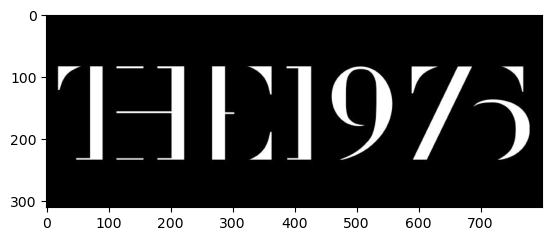

In [173]:
img = plt.imread("1975.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
tinggi, lebar = gray.shape
plt.imshow(gray, cmap='gray')

pada fungsi diatas merupakan fungsi untuk memanggil atau mengimport gambar dengan fungsi plt kemudian mengubah atau konversi warna gambar yang awalnya RGB menjadi GRAY dengan fungsi yang sudah disediakan oleh library cv2, kemudian menampilkan gambar tersebut dengan fungsi yang sudah disediakan oleh library matplotlib.

### SOAL

#### Lakukanlah proses morfologi citra pada gambar tersebut (erosi, dilasi, opening, dan closing) dengan kernel berukuran 5 x 5 (semua nilai di dalamnya adalah 1)!

In [174]:
kernel = np.ones((5,5), dtype=np.uint8)
kernelT, kernelL = kernel.shape

pada code diatas merupakan code untuk melakukan membuat kernel dengan ukuran 5x5 yang berisi angka 1 pada setiap element dengan bantuan fungsi np.ones sehingga pada setiap element 5x5 hanya berisikan 1 saja. kemudian mencari tinggi dan lebar kernel dengan menggunakan fungsi .shape sehingga tinggi dan lebar kernel dapat diketahui

In [175]:
def threshold(gambar):
    threshold = np.zeros_like(gambar)

    for y in range(tinggi):
        for x in range(lebar):
            if gambar[y, x] >=127:
                threshold[y, x] = 255

    return threshold

pada fungsi diatas merupakan fungsi untuk melakukan tresholding pada citra. fungsi tresholding ini akan mengubah citra yang awalnya grayscale menjadi biner. sehingga dapat memisahkan antara object dengan background. langkah awal yang dilakukan dalam tresholding adalah membuat array kosong yang seukuran dengan gambar kemudian melakukan fungsi perulangan untuk menentukan ambang nilai dari sebuah citra tersebut.

In [176]:
hasiltresholding = threshold(gray)

pada fungsi diatas merupakan fungsi untuk memanggil fungsi tresholding dengan parameter gambar yang sudah berbentuk grayscale.

EROSI

In [177]:
def erosi(image):
    result = np.zeros(image.shape)
    tinggikernel = kernelT //2
    lebarkernel = kernelL //2
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            erosi = True
            for k in range(kernelT):
                for l in range(kernelL):
                    if kernel[k, l] != 0:
                        x = i + k - tinggikernel
                        y = j + l - lebarkernel
                        if kernel[k, l] != 0 and (x < 0 or x >= image.shape[0] or y < 0 or y >= image.shape[1] or image[x, y] == 0):
                            erosi = False
                            break
                if not erosi:
                    break
            if erosi:
                result[i, j] = 255

    return result

pada fungsi diatas merupakan fungsi untuk melakukan operasi erosi yaitu dengan operasi untuk menghilangkan object-object kecil dalam citra yang tidak sesuai dengan kernel yang diberikan. langkah awalnya adalah membuat array kosong yang seukuran dengan citra tersebut, kemudian mencari titik tengah dari kernel tersebut dengan membagi dua kernel tersebut, lalu setelah itu dilakukan proses erosi dengan kernel 5x5 yang berisi nilai 1 pada setiap elementnya.kemudian setelah melakukan fungsi operasi erosi tersebut akan mengembalikan hasil dari fungsi perulangan dari erosi itu.

DILASI

In [178]:
def dilasi(image):
    hasil = np.zeros_like(image)
    tinggikernel = kernelT //2
    lebarkernel = kernelL //2

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] != 0:
                for k in range(kernelT):
                    for l in range(kernelL):
                        if kernel[k, l] != 0:
                            x = i + k - tinggikernel
                            y = j + l - lebarkernel
                            if kernel[k, l] != 0 and x >= 0 and x < image.shape[0] and y >= 0 and y < image.shape[1]:
                                hasil[x, y] = 255

    return hasil


pada fungsi diatas merupakan fungsi untuk melakukan operasi dilasi yaitu dengan operasi untuk memperbesar object-object dalam citra yang terkena dengan kernel yang diberikan. langkah awalnya adalah membuat array kosong yang seukuran dengan citra tersebut, kemudian mencari titik tengah dari kernel tersebut dengan membagi dua kernel tersebut, lalu setelah itu dilakukan proses dilasi dengan kernel 5x5 yang berisi nilai 1 pada setiap elementnya.kemudian setelah melakukan fungsi operasi dilasi tersebut akan mengembalikan hasil dari fungsi perulangan dari dilasi itu.

OPENING

In [179]:
def opening(image):
    satu = erosi(image)
    dua = dilasi(satu)
    
    return dua

code diatas merupakan fungsi untuk melakukan operasi opening dengan cara melakukan operasi erosi terlebih dahulu kemudian hasil dari erosi tersebut dilakukan operasi dilasi dengan parameter hasil erosi sebelumnya, sehingga setelah melakukan kombinasi dari kedua operator tersebut yaitu erosi dan dilasi maka akan menjadi operasi opening.

CLOSING

In [180]:
def closing(image):
    satu = dilasi(image)
    dua = erosi(satu)

    return dua

code diatas merupakan fungsi untuk melakukan operasi closing dengan cara melakukan operasi dilasi terlebih dahulu kemudian hasil dari dilasi tersebut dilakukan operasi erosi dengan parameter hasil dilasi sebelumnya, sehingga setelah melakukan kombinasi dari kedua operator tersebut yaitu dilasi dan erosi maka akan menjadi operasi closing.

In [181]:
erosiG = erosi(hasiltresholding)
dilasiG = dilasi(hasiltresholding)
openingG = opening(hasiltresholding)
closingG = closing(hasiltresholding)

pada code diatas merupakan code untuk memanggil fungsi dari keempat operasi tersebut dengan satu parameter saja yaitu gambar yang sudah dilakukan tresholding terlebih dahulu yaitu hasiltresholding. kemudian memanggil satu persatu fungsi secara berurutan dimulai diari erosi, dilasi , opening, dan yang terakhir adalah closing

(<AxesSubplot:title={'center':'Closing'}>,
 Text(0.5, 1.0, 'Closing'),
 <matplotlib.image.AxesImage at 0x2ba09efdb50>)

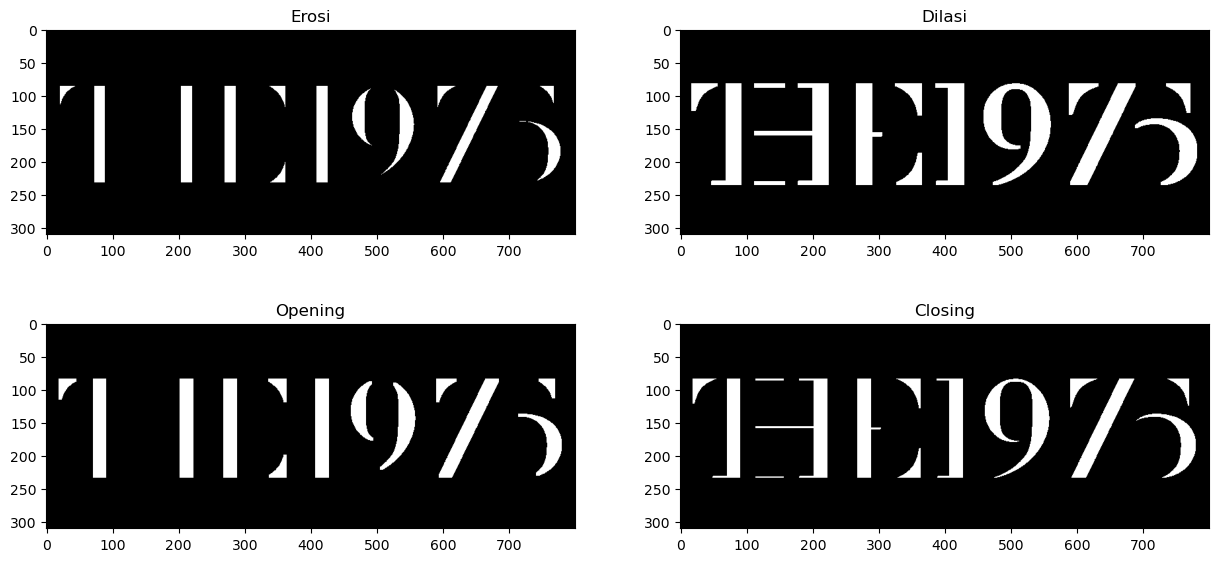

In [182]:
plt.figure(facecolor='white', figsize=[15, 7])
plt.subplot(221), plt.title('Erosi'), plt.imshow(erosiG, 'gray')
plt.subplot(222), plt.title('Dilasi'), plt.imshow(dilasiG, 'gray')
plt.subplot(223) ,plt.title('Opening'), plt.imshow(openingG, 'gray')
plt.subplot(224) ,plt.title('Closing'), plt.imshow(closingG, 'gray')

pada code diatas digunakan untuk menampilkan hasil dari keempat operasi yaitu erosi, dilasi , opening, dan closing dengan kernel yang sama. pada operasi erosi akan menghilangkan piksel-piksel yang tidak sesuai dengan kernel, pada operasi dilasi akan melakukan pembesaran piksel pada piksel yang terkena kernel, pada operasi opening merupakan hasil dari kombinasi erosi yang disertai dengan dilasi sedangkan pada operasi closing merupakan hasil dari kombinasi dilasi yang disertai dengan erosi  

#### lakukanlah proses morfologi citra jenis gradien morfologi pada citra dengan kernel yang sama

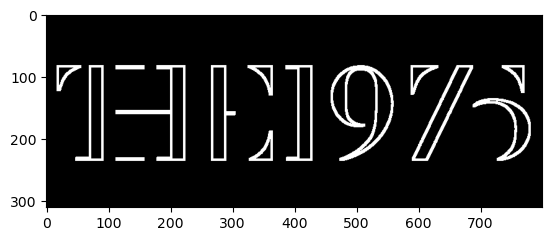

In [183]:
morfologi = np.abs(dilasiG - erosiG)
plt.imshow(morfologi, 'gray')

pada fungsi diatas merupakan fungsi untuk membuat morfologi jenis gradien dari citra tersebut dengan cara melakukan dilasi terlebih dahulu lalu melakukan erosi. setelah melakukan dua operasi tersebut kemudian dilakukan operasi pengurangan dengan dilasi - erosi sehingga akan menghasilkan gambar morfologi jenis gradien seperti gambar diatas.